### Assignment 3 - Edge detection, Image resampling and Template matching
*IKT213 Machine Vision*

__Name: Max Eckstein__\
__Date: 22.09.2025__

In [76]:
# --- Imports (required) ---

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [77]:
# --- Helper functions ---

def plot_image(img, title="Image", colored=True):
    if colored:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB (matplotlib uses RGB)
    plt.imshow(img, cmap='gray' if not colored else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

def save_image(image, filename : str, target_dir = "results"):
    os.makedirs(target_dir, exist_ok=True)
    save_path = os.path.join(target_dir, filename)
    cv2.imwrite(save_path, image)

#### Task 1 - Sobel edge detection

*Tutorial: https://learnopencv.com/edge-detection-using-opencv/*

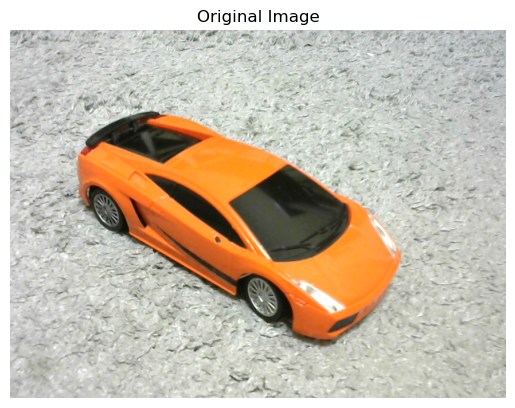

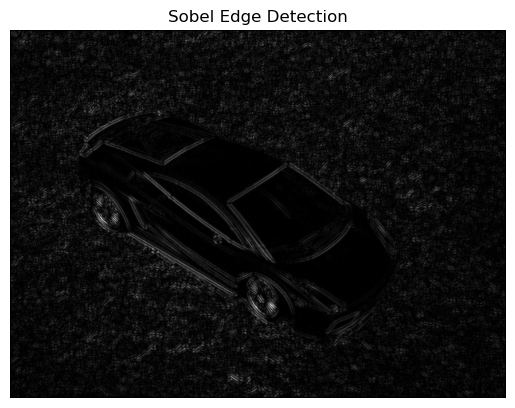

In [78]:
def sobel_edge_detection(image):
    """
    Applies Sobel edge detection (dx=1, dy=1, ksize=1) to the input image.
    The image is first converted to grayscale and blurred with a 3x3 Gaussian filter.
    The result is converted to uint8, displayed, and saved as 'sobel_edge_detection.png'.
    """
    ksize = (3,3)   # ADJUSTABLE: kernel size
    SigmaX = 0      # ADJUSTABLE: Gaussian kernel standard deviation in X direction

    # Display original image
    plot_image(image, title="Original Image", colored=True)
    # Convert to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, ksize, SigmaX)

    # Apply Sobel Edge Detection
    sobelxy_64f = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=1) # Compute the Sobel gradient
    sobelxy_u8 = cv2.convertScaleAbs(sobelxy_64f)  # Convert back to uint8
    
    # Display and save results
    plot_image(sobelxy_u8, title="Sobel Edge Detection", colored=False)
    save_image(sobelxy_u8, "sobel_edge_detection.png")

# --- Main code ---

img = cv2.imread('lambo.png')
sobel_edge_detection(img)

#### Task 2 - Canny edge detection

*Tutorial: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html*

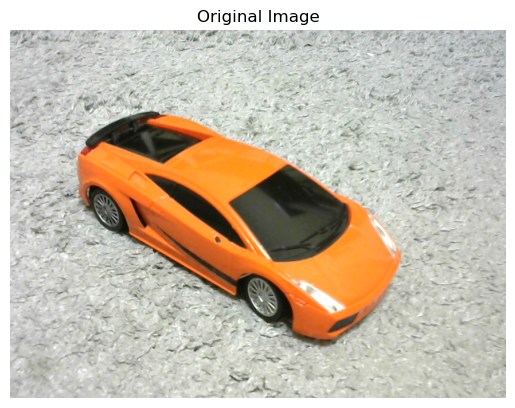

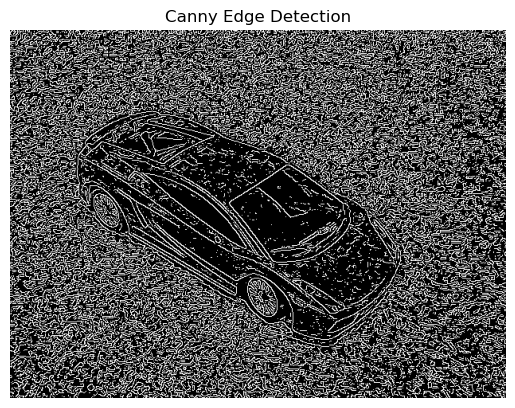

In [79]:
def canny_edge_detection(image, threshold_1=50, threshold_2=50):
    """
    Applies Canny edge detection to the input image.
    The image is first converted to grayscale and blurred with a 3x3 Gaussian filter.
    Edges are computed using the given thresholds and saved as 'canny_edge_detection.png'.
    """
    ksize = (3,3)   # ADJUSTABLE: kernel size
    SigmaX = 0      # ADJUSTABLE: Gaussian kernel standard deviation in X direction

    # Display original image
    plot_image(image, title="Original Image", colored=True)
    # Convert to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, ksize, SigmaX)

    # Apply Canny Edge Detection
    edges = cv2.Canny(img, threshold_1, threshold_2)
    
    # Display and save results
    plot_image(edges, title="Canny Edge Detection", colored=False)
    save_image(edges, "canny_edge_detection.png")

# --- Main code ---

img = cv2.imread('lambo.png')
canny_edge_detection(img, 50, 50)

#### Task 3 - Template match

*Tutorial: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html*

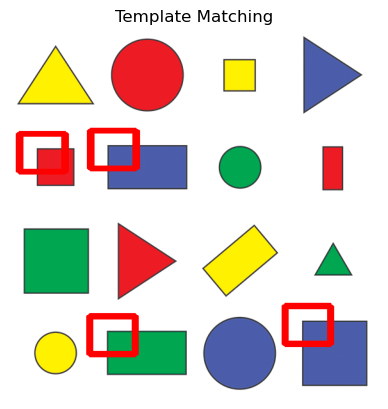

In [80]:
def template_match(image, template, threshold=0.9):
    """
    Performs template matching using cv2.matchTemplate with TM_CCOEFF_NORMED.
    Both the input image and the template are converted to grayscale.
    All matches with correlation score >= threshold are marked with red rectangles.
    The result is saved as 'template_match.png'.
    """
    method = cv2.TM_CCOEFF_NORMED # ADJUSTABLE: Matching method

    # Ensure input is color (for drawing) and prepare grayscale copies for matching
    vis = image.copy()
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    tpl_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # Template size
    h, w = tpl_gray.shape

    # Template matching (normalized correlation coefficient)
    res = cv2.matchTemplate(img_gray, tpl_gray, method)
    
    # Thresholding
    loc = np.where(res >= threshold)

    # Draw rectangles for all matches
    for pt in zip(*loc[::-1]):  # (x, y) points
        cv2.rectangle(vis, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

    # Display and save results
    plot_image(vis, title="Template Matching", colored=True)
    save_image(vis, "template_match.png")

# --- Main code ---

img = cv2.imread('shapes.png')
template = cv2.imread('shapes_template.jpg')
template_match(img, template, threshold=0.9)

#### Task 4 - Resizing

*Tutorial: https://docs.opencv.org/4.5.1/d4/d1f/tutorial_pyramids.html*

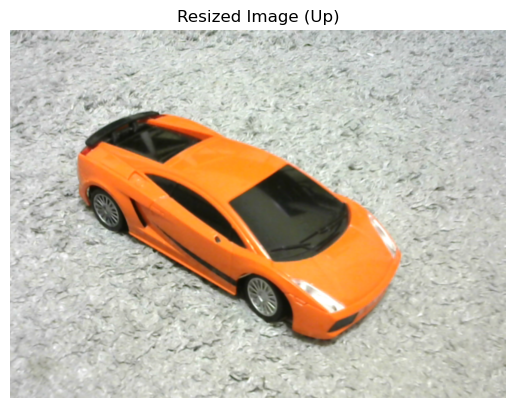

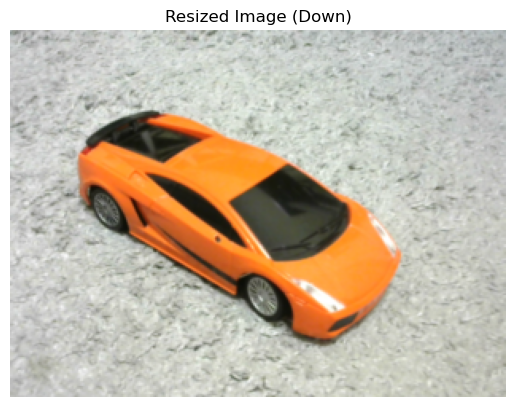

Original image size: (462, 623, 3)
Resize (up): (924, 1246, 3)
Resize (down): (231, 312, 3)


In [81]:
def resize(image, scale_factor : int, up_or_down : str):
    """
    Resizes the input image using image pyramids (pyrUp / pyrDown).
    - If up_or_down == "up"   and scale_factor == 2 → 2x larger
    - If up_or_down == "down" and scale_factor == 2 → 2x smaller
    The result is saved as 'resize.png' and returned.
    """
    if up_or_down not in ("up", "down"):
        raise ValueError("up_or_down must be 'up' or 'down'.")
    if scale_factor != 2:
        raise ValueError("This assignment requires image pyramids; only scale_factor == 2 is supported.")

    result = cv2.pyrUp(image) if up_or_down == "up" else cv2.pyrDown(image)

    return result
    
# --- Main code ---

img = cv2.imread('lambo.png')
result_up = resize(img, scale_factor=2, up_or_down="up")
plot_image(result_up, title="Resized Image (Up)", colored=True)
save_image(result_up, "resize_up.png")
result_down = resize(img, scale_factor=2, up_or_down="down")
plot_image(result_down, title="Resized Image (Down)", colored=True)
save_image(result_down, "resize_down.png")

print(f"Original image size: {img.shape}")
print(f"Resize (up): {result_up.shape}")
print(f"Resize (down): {result_down.shape}")